#### 1. Run an OLS regression using a different set of data. Use the regression class created in this chapter. Print the results.

In [1]:
import pandas as pd

data = pd.read_csv("pork.csv", index_col = "DATE")

In [2]:
print(data)

            pork price  slaughter     soybean       corn        wheat  \
DATE                                                                    
1990-01-01   93.147106        934  209.827483  105.900513  167.918579   
1990-02-01   80.003995        935  208.449456  106.294167  160.937271   
1990-03-01   79.910116       1341  218.279378  109.837318  156.528030   
1990-04-01   99.643558       1238  220.667957  118.498337  159.467529   
1990-05-01  115.678154        739  228.316003  121.254097  149.179291   
...                ...        ...         ...         ...         ...   
2020-05-01   62.783500       2097  309.331431  143.989244  174.954969   
2020-06-01   46.540000       1822  318.643037  148.042380  169.722337   
2020-07-01   46.187273       1955  328.935448  152.587620  170.574122   
2020-08-01   52.414286       2397  332.141177  149.393000  174.182477   
2020-09-01   65.591429       2800  366.824605  166.602533  204.137314   

                  beef      mutton      fish  
DAT

In [3]:
from regression import Regression
reg = Regression()
print(reg)

You created an instance of Stats


In [4]:
import pandas as pd  
import copy
from stats import *    
  
class Regression:  
    def __init__(self):  
        self.stats = stats()  
          
    def OLS(self, reg_name, data, y_name, beta_names, 
            min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
  
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")  

In [5]:
import pandas as pd
from regression import Regression

In [6]:
reg = Regression()
print(reg)

You created an instance of Stats


In [7]:
reg

In [8]:
# Selecting Variables
y_var = ["pork price"]
x_vars = ["slaughter", "soybean", 
          "corn ",
          "wheat","beef","mutton","fish"]

reg.OLS(reg_name = "Pork", data = data, y_name = y_var, beta_names = x_vars)
reg.data

,pork price,slaughter,soybean,corn,wheat,beef,mutton,fish,Constant,pork price estimator
DATE,,,,,,,,,,
1990-01-01,93.147106,934,209.827483,105.900513,167.918579,126.309998,111.899986,5.204495,1,68.426833
1990-02-01,80.003995,935,208.449456,106.294167,160.937271,111.459992,116.170013,5.646819,1,68.628239
1990-03-01,79.910116,1341,218.279378,109.837318,156.528030,112.670013,114.079987,5.610611,1,65.426281
1990-04-01,99.643558,1238,220.667957,118.498337,159.467529,112.129997,121.109993,5.631545,1,68.569708
1990-05-01,115.678154,739,228.316003,121.254097,149.179291,112.489990,122.519989,5.798833,1,74.409012
...,...,...,...,...,...,...,...,...,...,...
2020-05-01,62.783500,2097,309.331431,143.989244,174.954969,214.904762,110.341628,6.020297,1,73.337467
2020-06-01,46.540000,1822,318.643037,148.042380,169.722337,215.727273,110.697884,6.784127,1,78.165524
2020-07-01,46.187273,1955,328.935448,152.587620,170.574122,199.304348,110.584672,5.816351,1,74.024779


In [9]:
#regression.py
import numpy as np
# . . . 
def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
            max_val = None, constant = True):  
    self.min_val = min_val  
    if max_val != None:  
        self.max_val = max_val  
    else:  
        self.max_val = len(data)  
    self.reg_name = reg_name  
    self.y_name = y_name  
    self.beta_names = copy.copy(beta_names)
    self.data = data.copy()  
    if constant:  
        self.add_constant()  
    self.build_matrices()
    self.estimate_betas_and_yhat()
    
def build_matrices(self):  
    # Transform dataframes to matrices  
    self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])  
    # create a k X n nested list containg vectors for each exogenous var  
    self.X = np.matrix(self.data[self.beta_names])  
    self.X_transpose = np.matrix(self.X).getT()  
    # (X'X)**-1  
    X_transp_X = np.matmul(self.X_transpose, self.X)  
    self.X_transp_X_inv = X_transp_X.getI()  
    # X'y  
    self.X_transp_y = np.matmul(self.X_transpose, self.y)  

def estimate_betas_and_yhat(self):  
    # betas = (X'X)**-1 * X'y  
    self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)  
    # y-hat = X * betas  
    self.y_hat = np.matmul(self.X, self.betas)  
    # Create a column that holds y-hat values  
    self.data[self.y_name[0] + " estimator"] = \
        [i.item(0) for i in self.y_hat]  
    # create a table that holds the estimated coefficient  
    # this will also be used to store SEs, t-stats,and p-values  
    self.estimates = pd.DataFrame(self.betas, index = self.beta_names,  
                                  columns = ["Coefficient"])  
    # identify y variable in index  
    self.estimates.index.name = "y = " + self.y_name[0]

In [10]:
#econFreedomRegression.py
# . . .
reg = Regression()
# . . .
reg.OLS("Pork", data, y_var, x_vars)

You created an instance of Stats


In [11]:
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = pork price,,,,,
slaughter,-0.009008,0.001243,-7.244940,0.00000,***
soybean,-0.015471,0.022249,-0.695343,0.48729,
corn,0.174445,0.041751,4.178242,0.00004,***
wheat,-0.044106,0.030459,-1.448071,0.14846,
beef,0.104589,0.032386,3.229434,0.00135,**
mutton,0.126423,0.040046,3.156949,0.00173,**
fish,1.866996,0.806275,2.315583,0.02114,*
Constant,31.944719,6.614140,4.829761,0.00000,***


#### From the estimate results, we can obseve slaughter hogs seem have significant impact with the hog price, and next is the ingredient of corn
#### with regards to the substitutes of pork, mutton seems to be significant at 1%, fish at 5%.

In [12]:
print(reg.ssr, reg.sse, reg.sst)

36234.452259217236 82125.08622120644 118359.53848042343


In [13]:
#regression.py
# . . . 
def calculate_regression_stats(self):
    self.sum_square_stats()
    self.calculate_degrees_of_freedom()
    self.calculate_estimator_variance()
    self.calculate_covariance_matrix()

def calculate_degrees_of_freedom(self):  
    # Degrees of freedom compares the number of observations to the number  
    # of exogenous variables used to form the prediction  
    self.lost_degrees_of_freedom = len(self.estimates)  
    self.num_obs = self.max_val + 1 - self.min_val  
    self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  
         
def calculate_estimator_variance(self):  
    # estimator variance is the sse normalized by the degrees of freedom  
    # thus, estimator variance increases as the number of exogenous  
    # variables used in estimation increases(i.e., as degrees of freedom   
    # fall)  
    self.estimator_variance = self.sse / self.degrees_of_freedom  

def calculate_covariance_matrix(self):  
    # Covariance matrix will be used to estimate standard errors for  
    # each coefficient.  
    # estimator variance * (X'X)**-1  
    self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
    self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                   columns = self.beta_names,  
                                   index = self.beta_names)

In [14]:
reg = Regression()
reg.OLS("pork", data, y_var, x_vars)

You created an instance of Stats


In [15]:
reg.ssr, reg.sse, reg.sst

reg.stats_DF

,Estimation Statistics
r**2,0.306139
Adj. r**2,0.292722
f-stat,22.816887
Est Var,226.864879
MSE,15.062034
SSE,82125.086221
SSR,36234.452259
SST,118359.538480
Obs.,370.000000
DOF,362.000000


In [16]:
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,slaughter,soybean,corn,wheat,beef,mutton,fish,Constant
slaughter,1.545851e-06,-7.209570e-07,-0.000003,0.000003,-0.000016,-0.000004,0.000096,-0.000597
soybean,-7.209570e-07,4.950346e-04,-0.000600,-0.000150,-0.000187,-0.000137,-0.002711,0.023186
corn,-3.314353e-06,-6.000144e-04,0.001743,-0.000615,-0.000099,0.000447,0.006177,-0.041510
wheat,2.752522e-06,-1.502257e-04,-0.000615,0.000928,0.000177,-0.000401,-0.003177,0.016655
beef,-1.604465e-05,-1.866934e-04,-0.000099,0.000177,0.001049,0.000171,-0.012950,-0.025553
mutton,-3.657996e-06,-1.370140e-04,0.000447,-0.000401,0.000171,0.001604,0.009266,-0.227532
fish,9.633954e-05,-2.710707e-03,0.006177,-0.003177,-0.012950,0.009266,0.650079,-2.501522
Constant,-5.972538e-04,2.318591e-02,-0.041510,0.016655,-0.025553,-0.227532,-2.501522,43.746852


#### 2.Create scatter plots of the observation and predicted values as demonstrated at the end of this chapter.

In [17]:
reg.data

,pork price,slaughter,soybean,corn,wheat,beef,mutton,fish,Constant,pork price estimator
DATE,,,,,,,,,,
1990-01-01,93.147106,934,209.827483,105.900513,167.918579,126.309998,111.899986,5.204495,1,68.426833
1990-02-01,80.003995,935,208.449456,106.294167,160.937271,111.459992,116.170013,5.646819,1,68.628239
1990-03-01,79.910116,1341,218.279378,109.837318,156.528030,112.670013,114.079987,5.610611,1,65.426281
1990-04-01,99.643558,1238,220.667957,118.498337,159.467529,112.129997,121.109993,5.631545,1,68.569708
1990-05-01,115.678154,739,228.316003,121.254097,149.179291,112.489990,122.519989,5.798833,1,74.409012
...,...,...,...,...,...,...,...,...,...,...
2020-05-01,62.783500,2097,309.331431,143.989244,174.954969,214.904762,110.341628,6.020297,1,73.337467
2020-06-01,46.540000,1822,318.643037,148.042380,169.722337,215.727273,110.697884,6.784127,1,78.165524
2020-07-01,46.187273,1955,328.935448,152.587620,170.574122,199.304348,110.584672,5.816351,1,74.024779


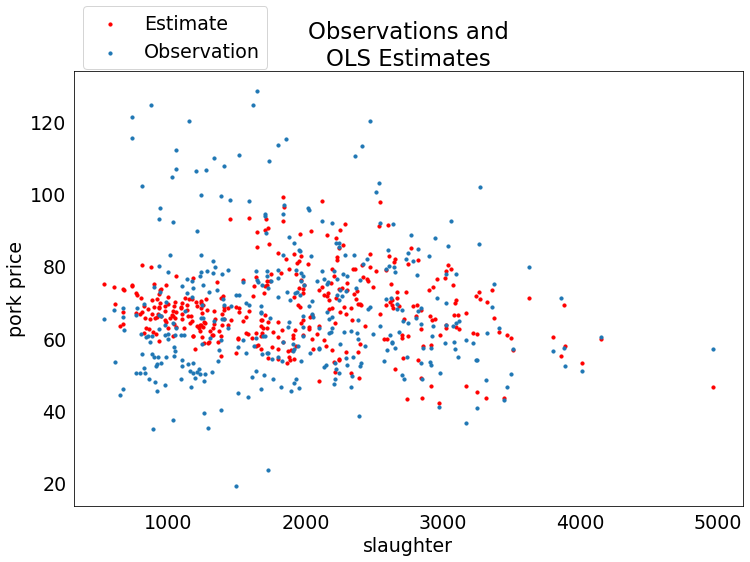

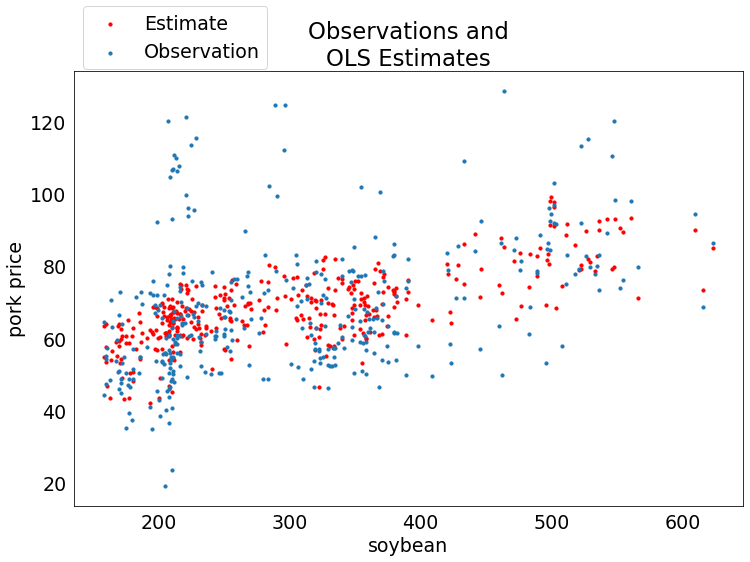

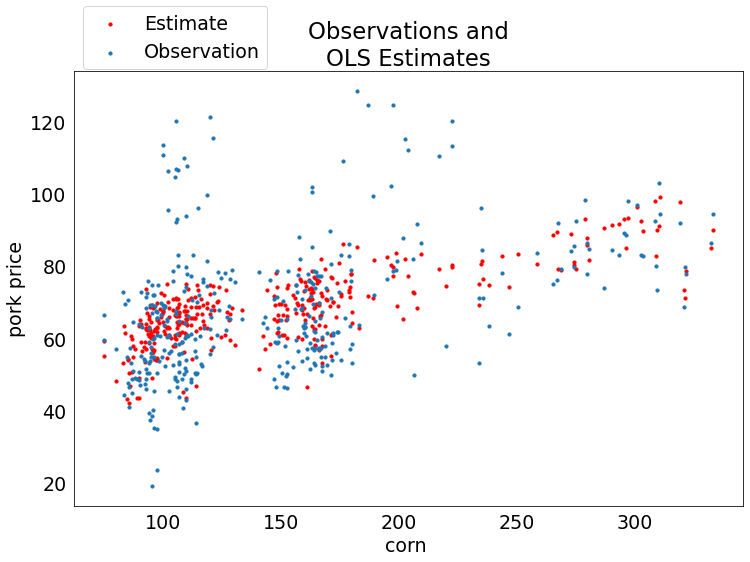

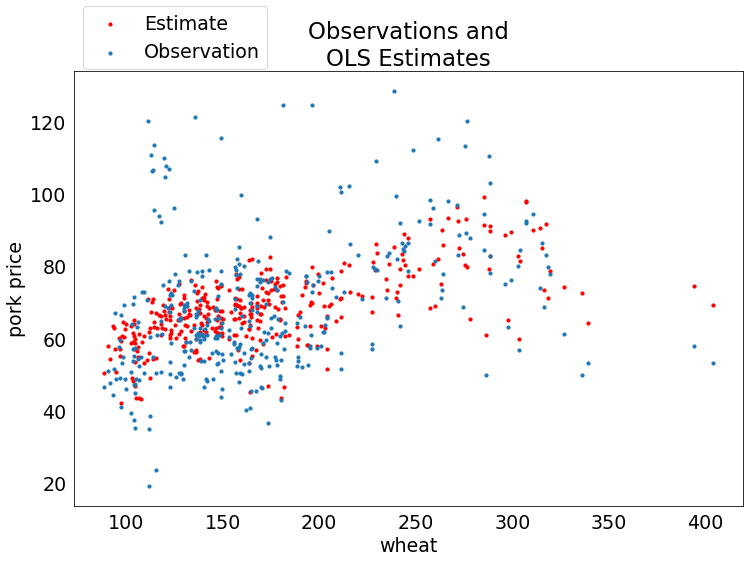

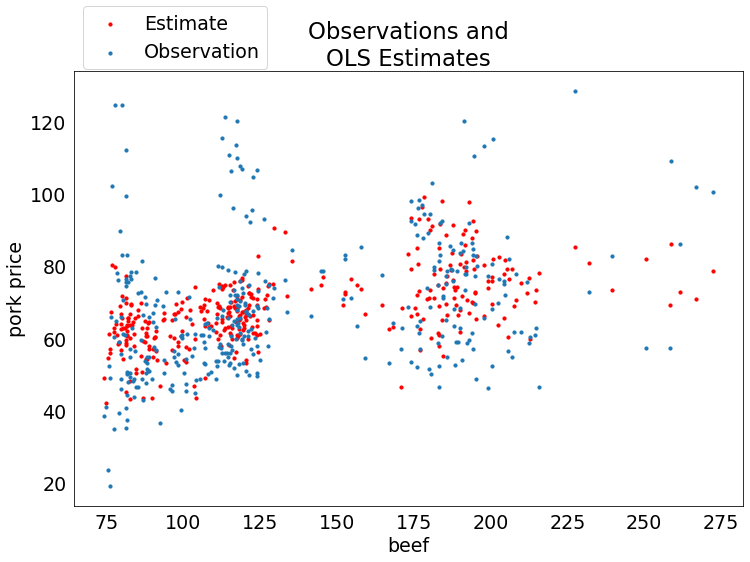

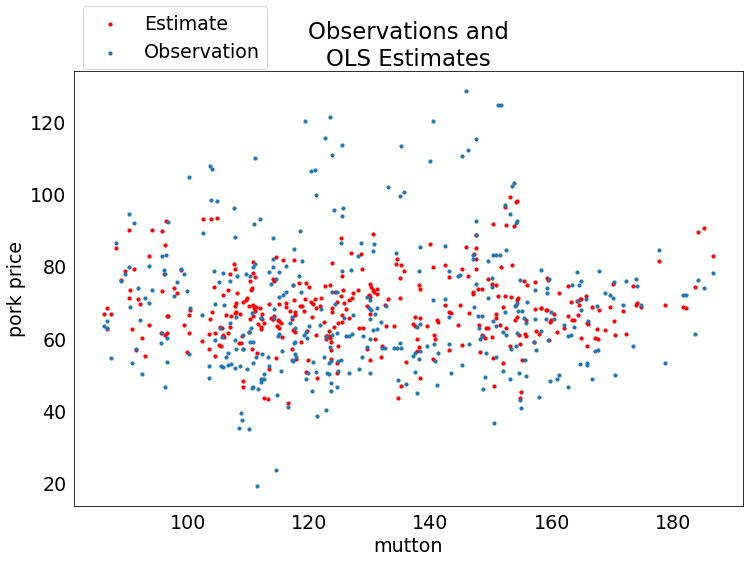

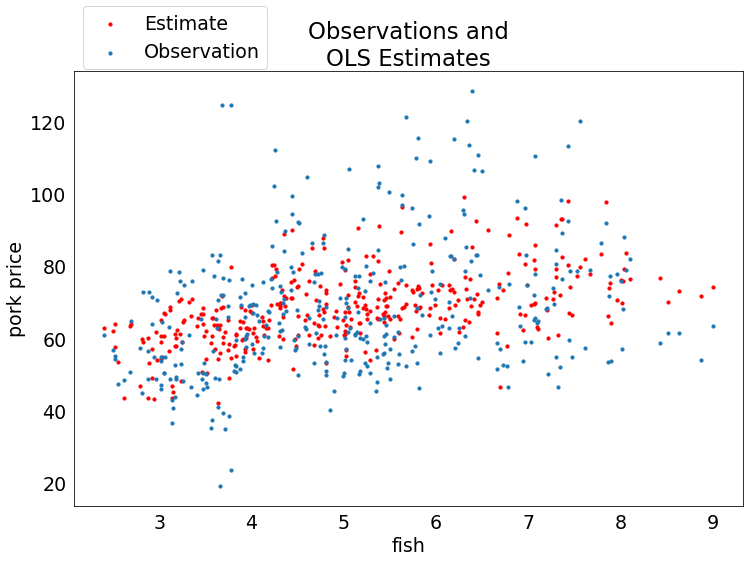

In [18]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("porkRegressionPlots.pdf")

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    # set default font size
    fig = plt.rcParams.update({"font.size":19})
    
    # use a loop to call each exogenous
    y = y_var[0]
    for x in x_vars:
        fig, ax = plt.subplots(figsize=(12,8))
        y_label1 = "Estimate"
        y_label2 = "Observation"
        data.plot.scatter(x=x, y=y + " estimator", ax = ax, c = "r",
                         s = 10, label = y_label1, legend = False)
        
        # erase the y_axis label so that "estimtor" is not present
        plt.ylabel("")
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, 
                          label = y_label2, legend = False)
        plt.legend(loc="upper left", labels = [y_label1, y_label2],
                  bbox_to_anchor = (0, 1.17))
        
        plt.title("Observations and\nOLS Estimates")
        # remove lines marking unit on the axis
        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")
        pp.savefig(fig, bbox_inches = "tight")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var, pp)
pp.close()

#### 3.Use the numpy libraries log function to log some or all value in your data. Print the columns of data that have been logged. (hint: pass the appropriate list of keys to the dataframe, data[[key1,key2,key3…]])

In [19]:
import numpy as np
data["pork price"] = np.log(data["pork price"])
data["pork price"]

DATE
1990-01-01    4.534180
1990-02-01    4.382077
1990-03-01    4.380902
1990-04-01    4.601599
1990-05-01    4.750812
                ...   
2020-05-01    4.139692
2020-06-01    3.840312
2020-07-01    3.832704
2020-08-01    3.959179
2020-09-01    4.183445
Name: pork price, Length: 369, dtype: float64

In [22]:
import numpy as np
log_val = np.log(data)
print(log_val)

            pork price  slaughter   soybean     corn      wheat      beef  \
DATE                                                                        
1990-01-01    1.511644   6.839476  5.346286  4.662500  5.123479  4.838739   
1990-02-01    1.477523   6.840547  5.339697  4.666210  5.081015  4.713666   
1990-03-01    1.477255   7.201171  5.385776  4.699000  5.053235  4.724463   
1990-04-01    1.526404   7.121252  5.396659  4.774899  5.071840  4.719659   
1990-05-01    1.558316   6.605298  5.430731  4.797888  5.005149  4.722864   
...                ...        ...       ...       ...       ...       ...   
2020-05-01    1.420621   7.648263  5.734413  4.969739  5.164529  5.370195   
2020-06-01    1.345554   7.507690  5.764071  4.997499  5.134164  5.374015   
2020-07-01    1.343571   7.578145  5.795862  5.027739  5.139170  5.294833   
2020-08-01    1.376037   7.781973  5.805560  5.006580  5.160103  5.300458   
2020-09-01    1.431135   7.937375  5.904884  5.115611  5.318793  5.286889   

In [23]:
log_val.to_csv('file2.csv') 

#### 4.Run the same regression again. Print the results. How has the significance changed?

In [24]:
import pandas as pd

data = pd.read_csv("file1.csv", index_col = "DATE")
#econFreedomRegression.py
# . . .
reg = Regression()
# . . .
reg.OLS("log_pork", data, y_var, x_vars)

You created an instance of Stats


In [25]:
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = pork price,,,,,
slaughter,-0.052176,0.008052,-6.480152,0.00000,***
soybean,-0.027241,0.024906,-1.093745,0.27479,
corn,0.108974,0.027746,3.927507,0.00010,***
wheat,-0.029163,0.020534,-1.420210,0.15640,
beef,0.058314,0.016121,3.617291,0.00034,***
mutton,0.067645,0.018354,3.685658,0.00026,***
fish,0.026406,0.014760,1.789056,0.07444,
Constant,0.932999,0.099476,9.379147,0.00000,***


In [ ]:
#### after loggging all the variables, it seems slaughter is still significant at 1%. same with the corn.
#### Beef significance level changed, it used to be significant at 5% but now it is 1%. 
####

In [26]:
reg.cov_matrix.to_csv("log_regCovMatrix.csv")
reg.cov_matrix

,slaughter,soybean,corn,wheat,beef,mutton,fish,Constant
slaughter,0.000065,-0.000003,-0.000027,0.000018,-0.000051,-0.000012,0.000020,-0.000153
soybean,-0.000003,0.000620,-0.000470,-0.000020,-0.000092,-0.000090,-0.000047,-0.000103
corn,-0.000027,-0.000470,0.000770,-0.000337,-0.000039,0.000145,0.000061,0.000170
wheat,0.000018,-0.000020,-0.000337,0.000422,0.000056,-0.000133,-0.000058,-0.000041
beef,-0.000051,-0.000092,-0.000039,0.000056,0.000260,0.000034,-0.000122,-0.000424
mutton,-0.000012,-0.000090,0.000145,-0.000133,0.000034,0.000337,0.000086,-0.001372
fish,0.000020,-0.000047,0.000061,-0.000058,-0.000122,0.000086,0.000218,-0.000058
Constant,-0.000153,-0.000103,0.000170,-0.000041,-0.000424,-0.001372,-0.000058,0.009895


#### 5.Plot the new results using scatter plots as in question 2.

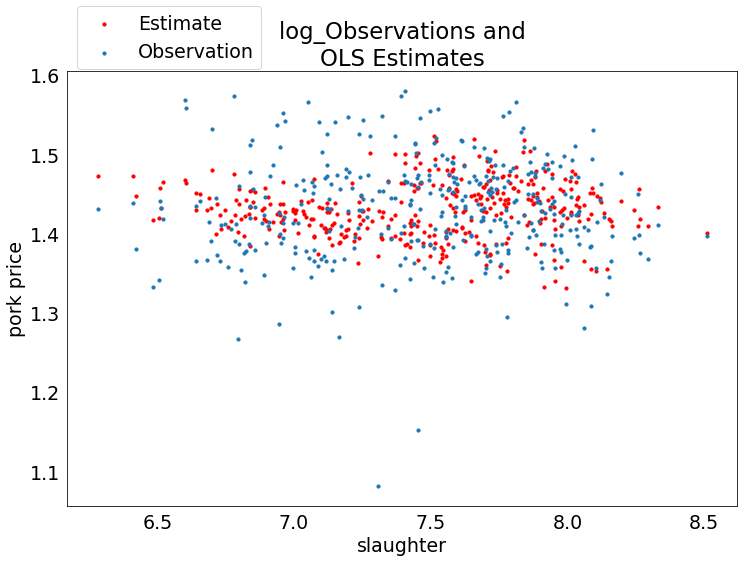

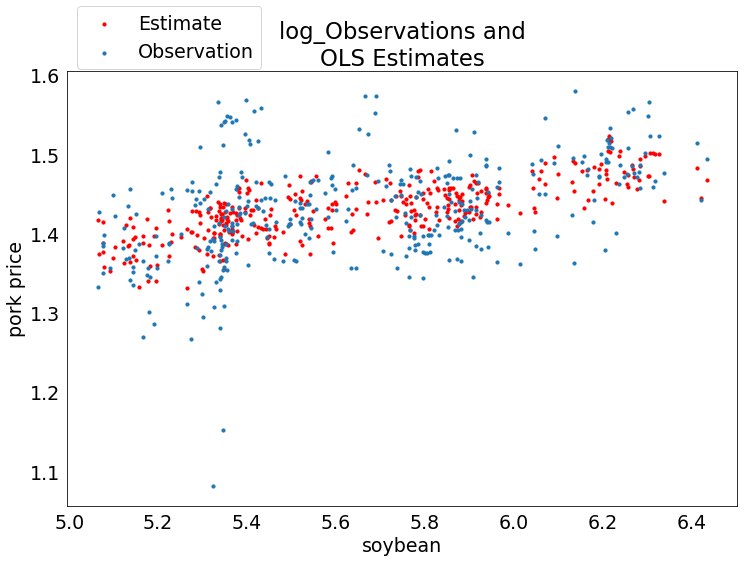

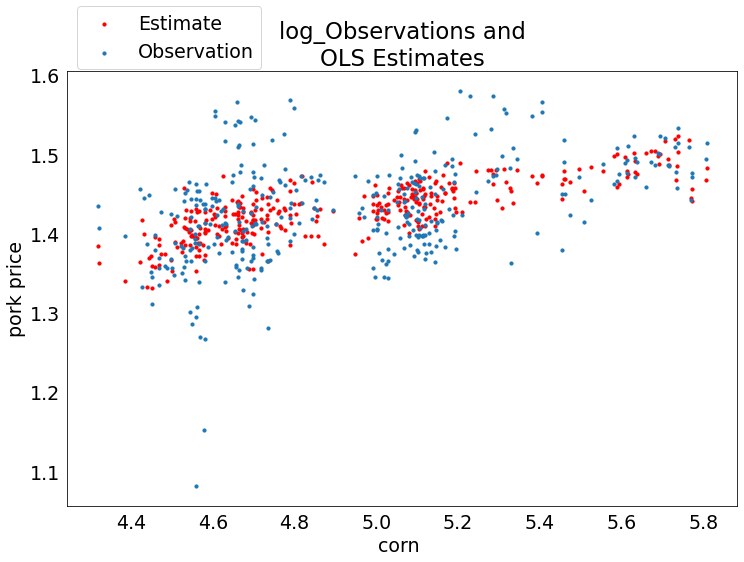

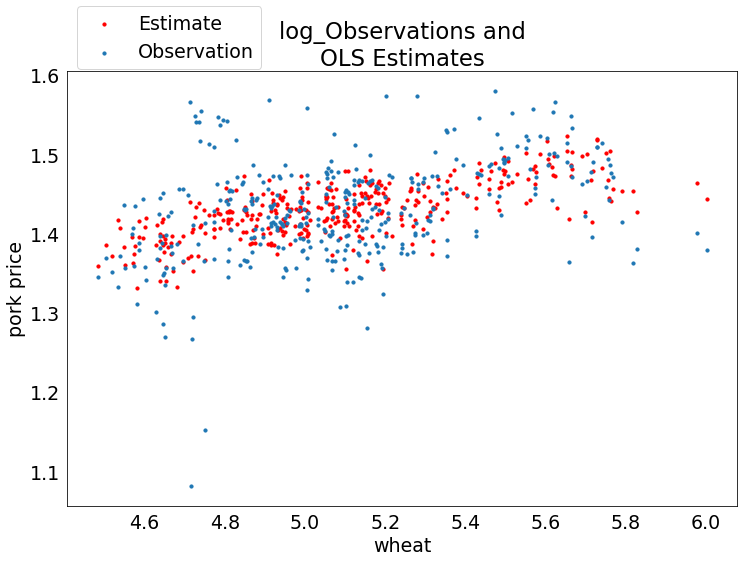

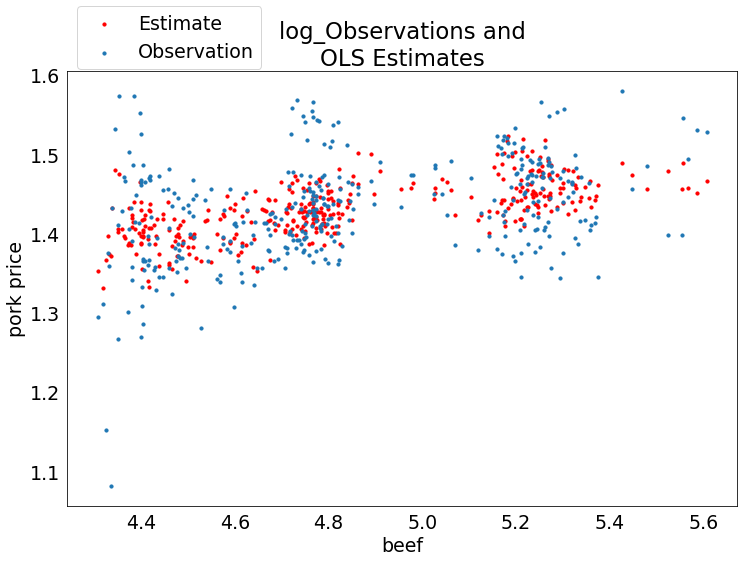

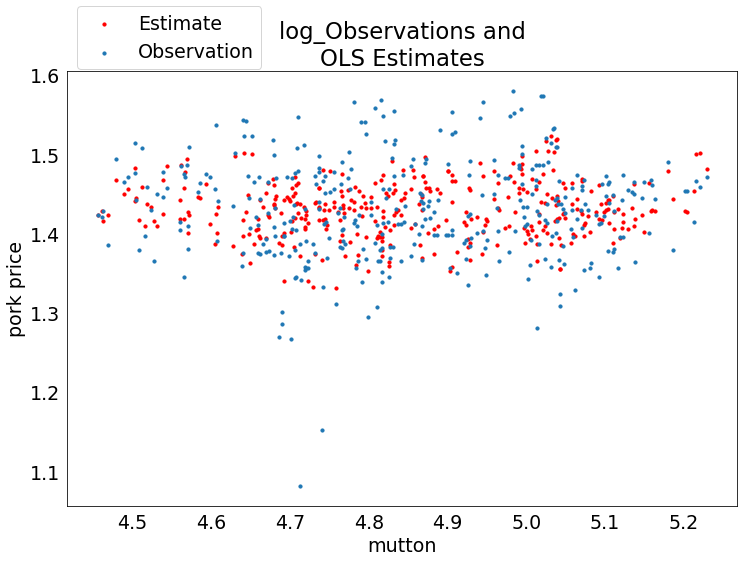

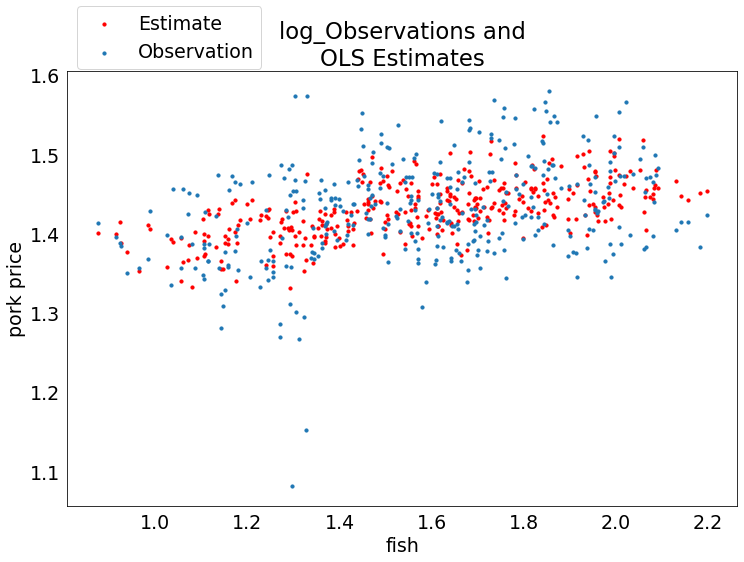

In [27]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("log_porkRegressionPlots.pdf")

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    # set default font size
    fig = plt.rcParams.update({"font.size":19})
    
    # use a loop to call each exogenous
    y = y_var[0]
    for x in x_vars:
        fig, ax = plt.subplots(figsize=(12,8))
        y_label1 = "Estimate"
        y_label2 = "Observation"
        data.plot.scatter(x=x, y=y + " estimator", ax = ax, c = "r",
                         s = 10, label = y_label1, legend = False)
        
        # erase the y_axis label so that "estimtor" is not present
        plt.ylabel("")
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, 
                          label = y_label2, legend = False)
        plt.legend(loc="upper left", labels = [y_label1, y_label2],
                  bbox_to_anchor = (0, 1.17))
        
        plt.title("log_Observations and\nOLS Estimates")
        # remove lines marking unit on the axis
        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")
        pp.savefig(fig, bbox_inches = "tight")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var, pp)
pp.close()

#### 6. Create 2 unique visualizations of the results using matplotlib (e.g., time series predicted values and observations, plots with more than 2 variables represented such as 3D plane or changing size of dots, a plot comparing results of the logged and unlogged regression, etc…). For visualization ideas visit the matplotlib website.

You created an instance of Stats


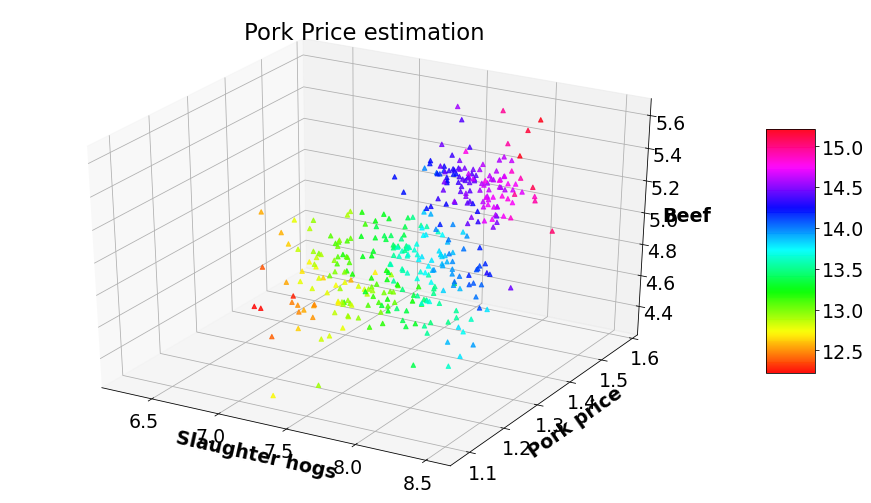

In [47]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("file1.csv", index_col = "DATE")

x = data["slaughter"]
y = data["pork price"]
z = data["beef"]

reg = Regression()
# . . .
reg.OLS("log_pork", data, y_var, x_vars)
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("Pork Price estimation")
ax.set_xlabel('Slaughter hogs', fontweight ='bold') 
ax.set_ylabel('Pork price', fontweight ='bold') 
ax.set_zlabel('Beef', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()
